In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [24]:
import pandas as pd
path = 'ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


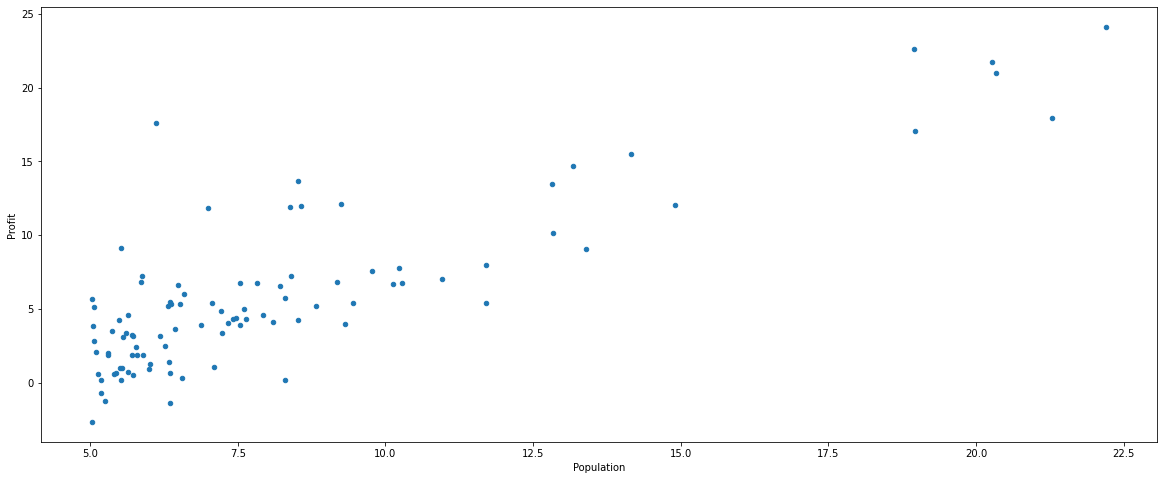

In [25]:

data.plot(kind="scatter",x="Population",y="Profit",figsize=(20,8))
plt.show()

In [26]:
def computecost(X,y,theta):
    X=np.matrix(X)
    y=np.matrix(y)
    theta=np.matrix(theta)
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner)/(2*len(X))

In [27]:
data.insert(0,'ones',1)

In [28]:
data

,ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [29]:
cols=data.shape[1]


In [30]:
cols

3

In [31]:
X=data.iloc[:,:cols-1]
y=data.iloc[:,cols-1:cols]

In [32]:
X

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [33]:
theta = np.zeros(2)

In [43]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

AttributeError: 'matrix' object has no attribute 'values'

In [35]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (2,))

In [36]:
computecost(X,y,theta)

32.072733877455676

In [37]:
X.shape, theta.shape, y.shape

((97, 2), (2,), (97, 1))

In [44]:
def grandientdescnt(X,y,theta,alpha,iters):

    
    temp=np.matrix(np.zeros(theta.shape))
    paramters=int(theta.ravel().shape[1])#theta有几个
    cost=np.zeros(iters) #保存每次迭代的cost
    
    for i in range(iters):

        error = (X*theta.T) - y
        
        for j in range(paramters): #遍历theta有几个，一元线性回归为J=0和J=1
            #j=0时优化theta0
            #对代价函数求导过后相当于error乘以对应的X的子矩阵
            term=np.multiply(error,X[:,j])
            #theta[0,j+1]=theta[0,j]-alpha*diff(costfunc,theta[0,j])
            #0-1赋给temp
            temp=theta[0,j]-(alpha/len(X)*np.sum(term))
            
        #更新theta
        theta=term
        cost[i] = computecost(X,y,theta)
        
    return theta, cost

In [45]:
alpha=0.01
iters=1000

In [46]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (2,))

In [47]:
theta.T

array([0, 0])

In [48]:

g,cost=grandientdescnt(X,y,theta,alpha,iters)

IndexError: tuple index out of range